In [49]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
class NeuralNetwork(object):
    
    def __init__(self, n_input_dim, n_output_dim, n_hidden_dim, n_iterations):
        self.w1 = np.random.randn(n_input_dim, n_hidden_dim) / np.sqrt(n_input_dim)
        self.b1 = np.zeros((1, n_hidden_dim))
        self.w2 = np.random.randn(n_hidden_dim, n_output_dim) / np.sqrt(n_hidden_dim)
        self.b2 = np.zeros((1, n_output_dim))
        self.n_iterations = n_iterations
        self.learning_rate = 0.01
        self.regularization = 0.01
        
    def train(self, x, y):
        for i in range(self.n_iterations):
            #Forward Propagation
            
            z1 = x.dot(self.w1) + self.b1
            a1 = np.tanh(z1)
            z2 = a1.dot(self.w2) + self.b2
            exp_scores = np.exp(z2)
            #y^ = a2
            a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            
            #Backward Propagation, Simple Gradient Descent
            
            delta3 = a2
            delta3[range(len(x)), y] -= 1 # y^ - y
            dW2 = a1.T.dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = (1 - np.power(np.tanh(z1), 2)) * delta3.dot(self.w2.T)
            dW1 = x.T.dot(delta2)
            db1 = np.sum(delta2, axis=0)
            
            # Add regularization terms
            dW2 += self.regularization * self.w2
            dW1 += self.regularization * self.w1
            
            # Update Parameters through Gradient Descent
            self.w1 += -self.learning_rate * dW1
            self.b1+= -self.learning_rate * db1
            self.w2 += -self.learning_rate * dW2
            self.b2 += -self.learning_rate * db2
    
    def predict(self, x):
        z1 = x.dot(self.w1) + self.b1
        a1 = np.tanh(z1)
        z2 = a1.dot(self.w2) + self.b2
        exp_scores = np.exp(z2)
        a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return np.argmax(a2, axis=1)
    

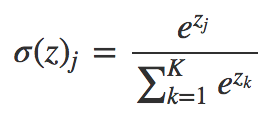

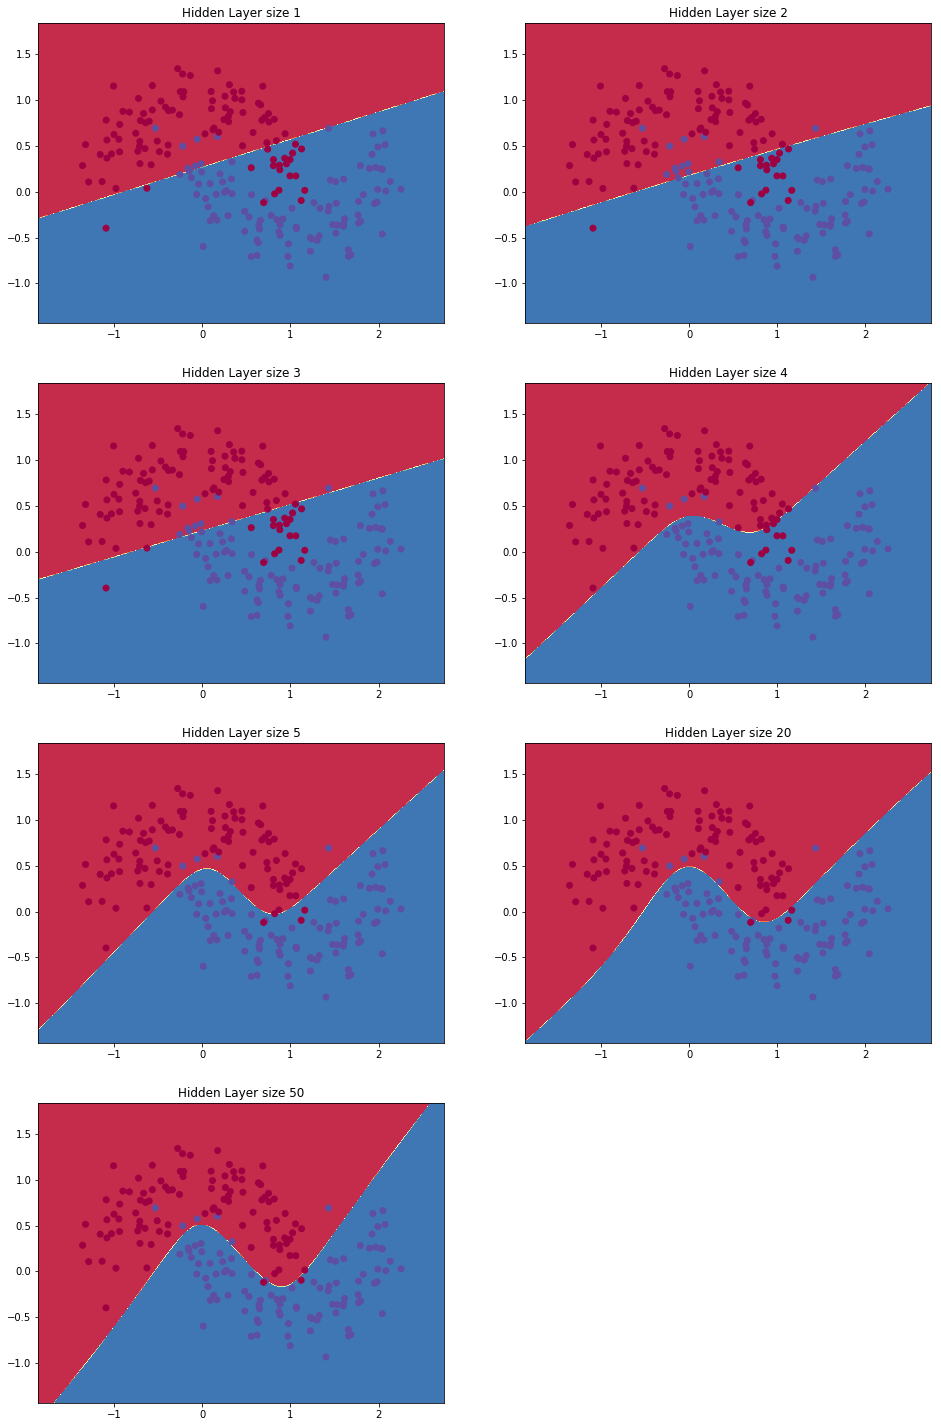

In [54]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)

plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    nn = NeuralNetwork(2, 2, nn_hdim , 100)
    nn.train(X, y)
    plot_decision_boundary(lambda x: nn.predict(x))
plt.show()